## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

Sources 

https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/
https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
https://www.datacamp.com/tutorial/seaborn-heatmaps
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
https://seaborn.pydata.org/tutorial/color_palettes.html
https://stackoverflow.com/questions/57039391/getting-number-of-values-in-each-cluster-in-kmeans-algorithm
https://stackoverflow.com/questions/33246771/how-to-convert-single-row-pandas-data-frame-to-series

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [73]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Random state seed
rseed = 42

## Load and explore data

In [75]:
# Import the dataset
dset = pd.read_csv('Country-data.csv')
dset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [76]:
# Check the shape

dset.shape

(167, 10)

The dataset has 167 rows/samples and 10 columns/features

In [77]:
# Check datatypes & counts 

dset.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [78]:
dset.count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [79]:
# Get descriptive statistics
dset.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Preprocessing and Feature Selection

In [80]:
# Identify any missing data

dset.isna().any()


country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

There is no missing data in any of the columns 

In [81]:
# Drop any non-numeric features (columns)
dset.drop('country', axis = 1, inplace = True) 
dset


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<Axes: >

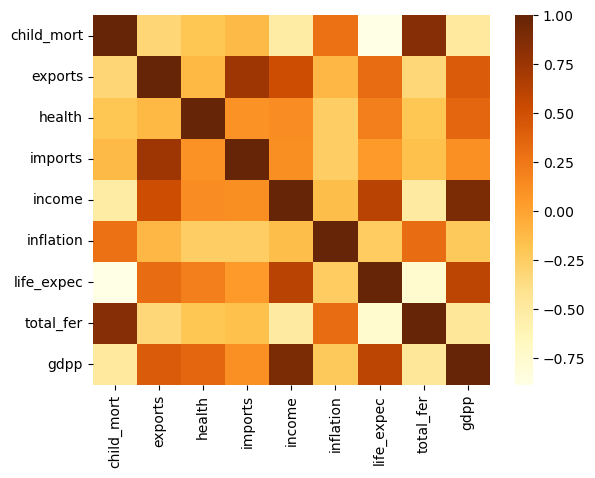

In [82]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap


sns.heatmap(dset.corr(), cmap = 'YlOrBr')




We see that the strongest correlations are child mortality-total fertility and income-GDDP


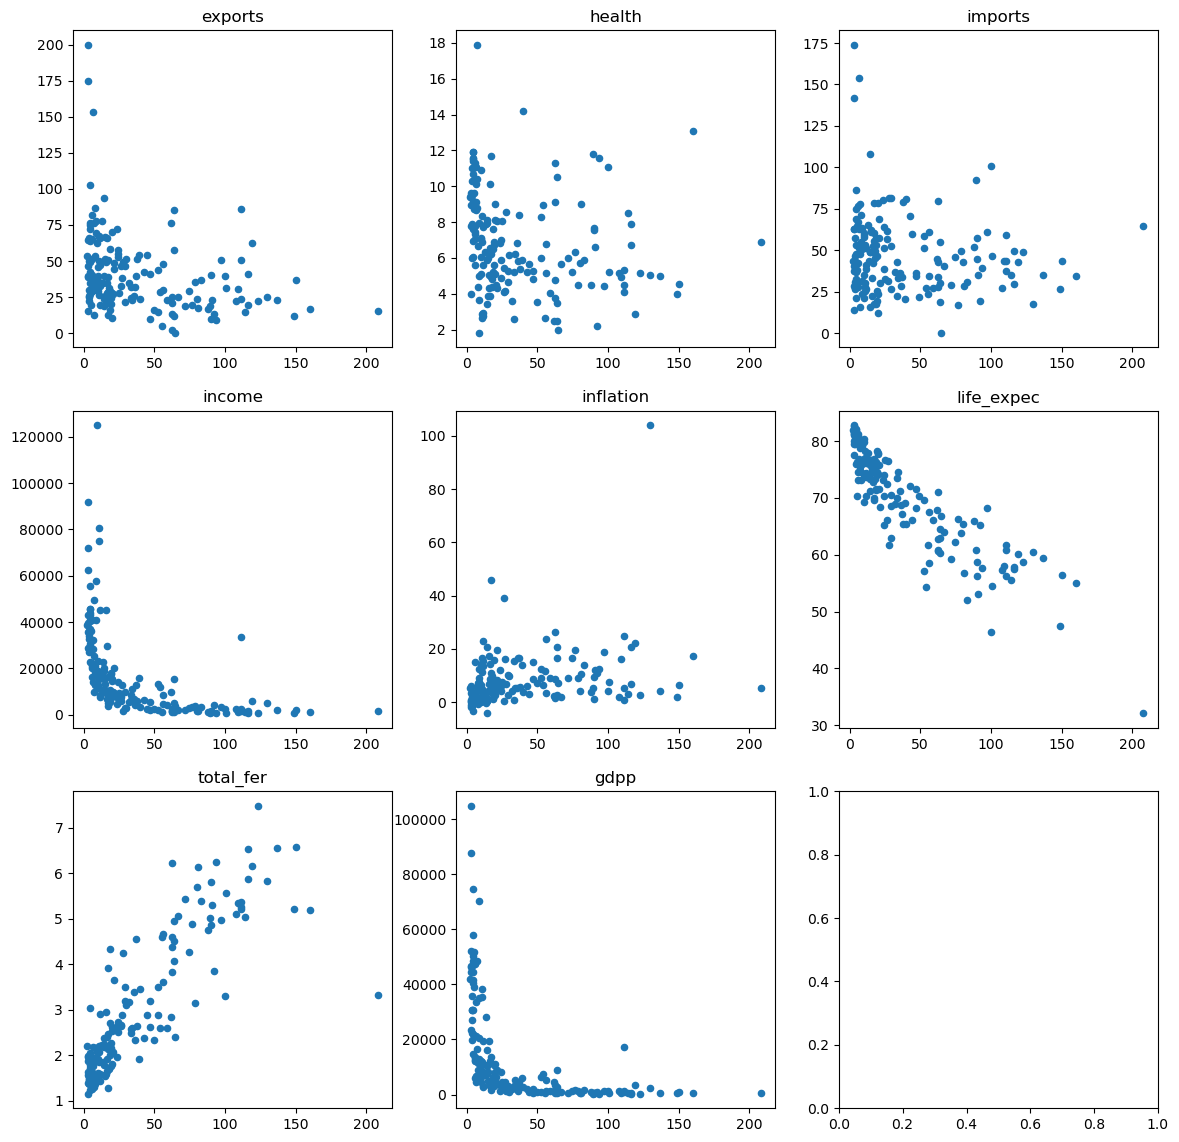

In [87]:
# Explore the continuous independent features against child_mort using scatter plots.
clist = dset.columns.to_list()

dset[clist]
fig, ax = plt.subplots(3, 3, figsize = (14,14)) 

def place_grid(ind):
    subpl_row = int((ind - ind%3)/3)
    subpl_col = int(ind%3)
    return subpl_row, subpl_col

for col in clist[1:]:
    ax[place_grid(clist[1:].index(col))].scatter(dset['child_mort'], dset[col], s = 20)
    ax[place_grid(clist[1:].index(col))].set_title(col)


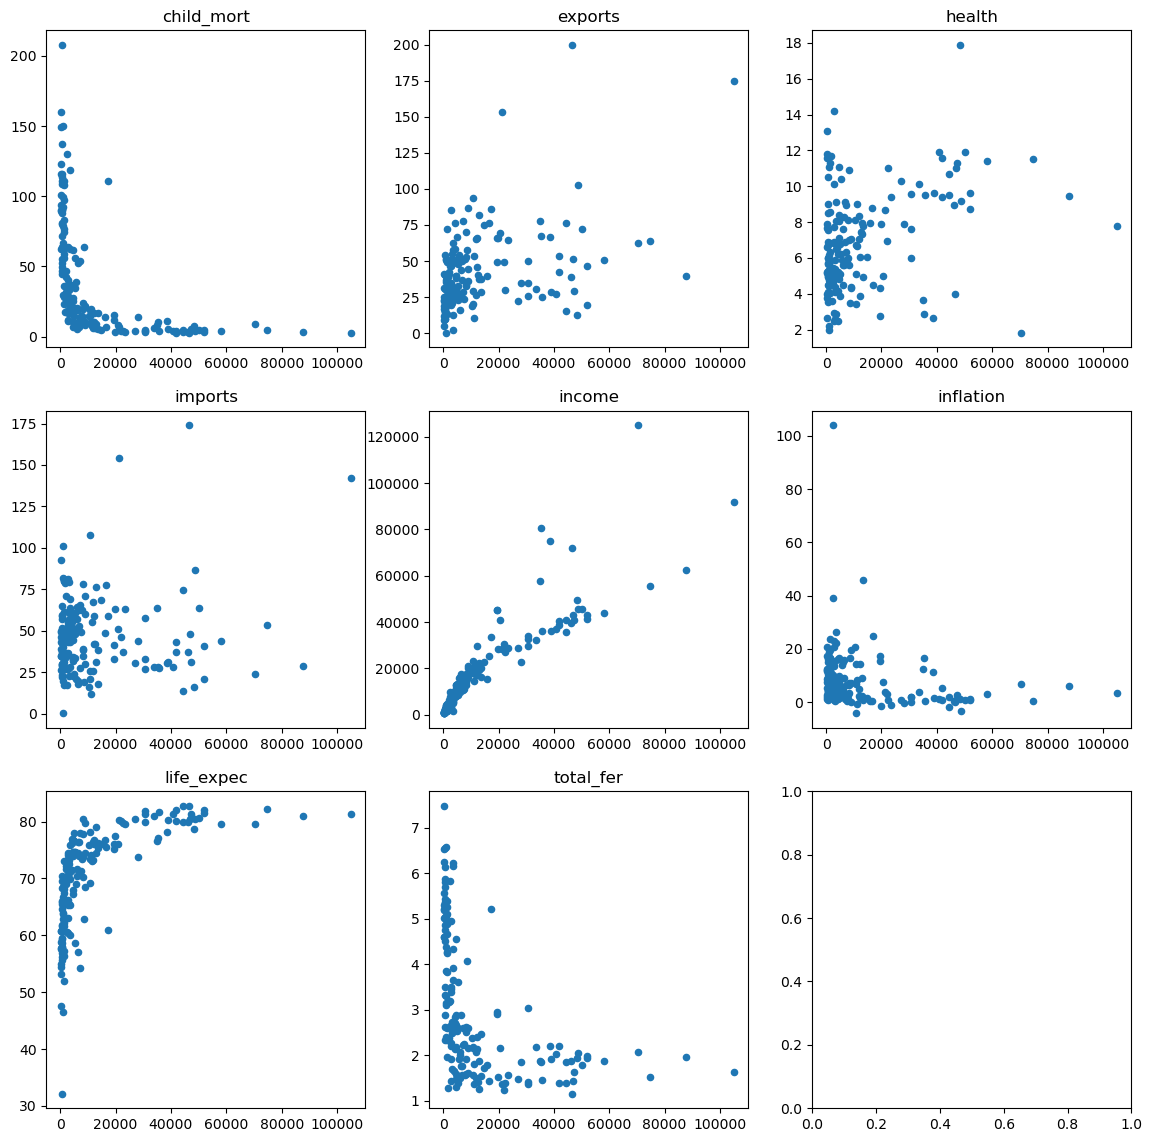

In [88]:
# Explore the continuous independent features against gdpp using scatter plots

clist = dset.columns.to_list()


fig, ax = plt.subplots(3, 3, figsize = (14,14)) 

for col in clist[:-1]:
    ax[place_grid(clist[:-1].index(col))].scatter(dset['gdpp'], dset[col], s = 20)
    ax[place_grid(clist[:-1].index(col))].set_title(col)

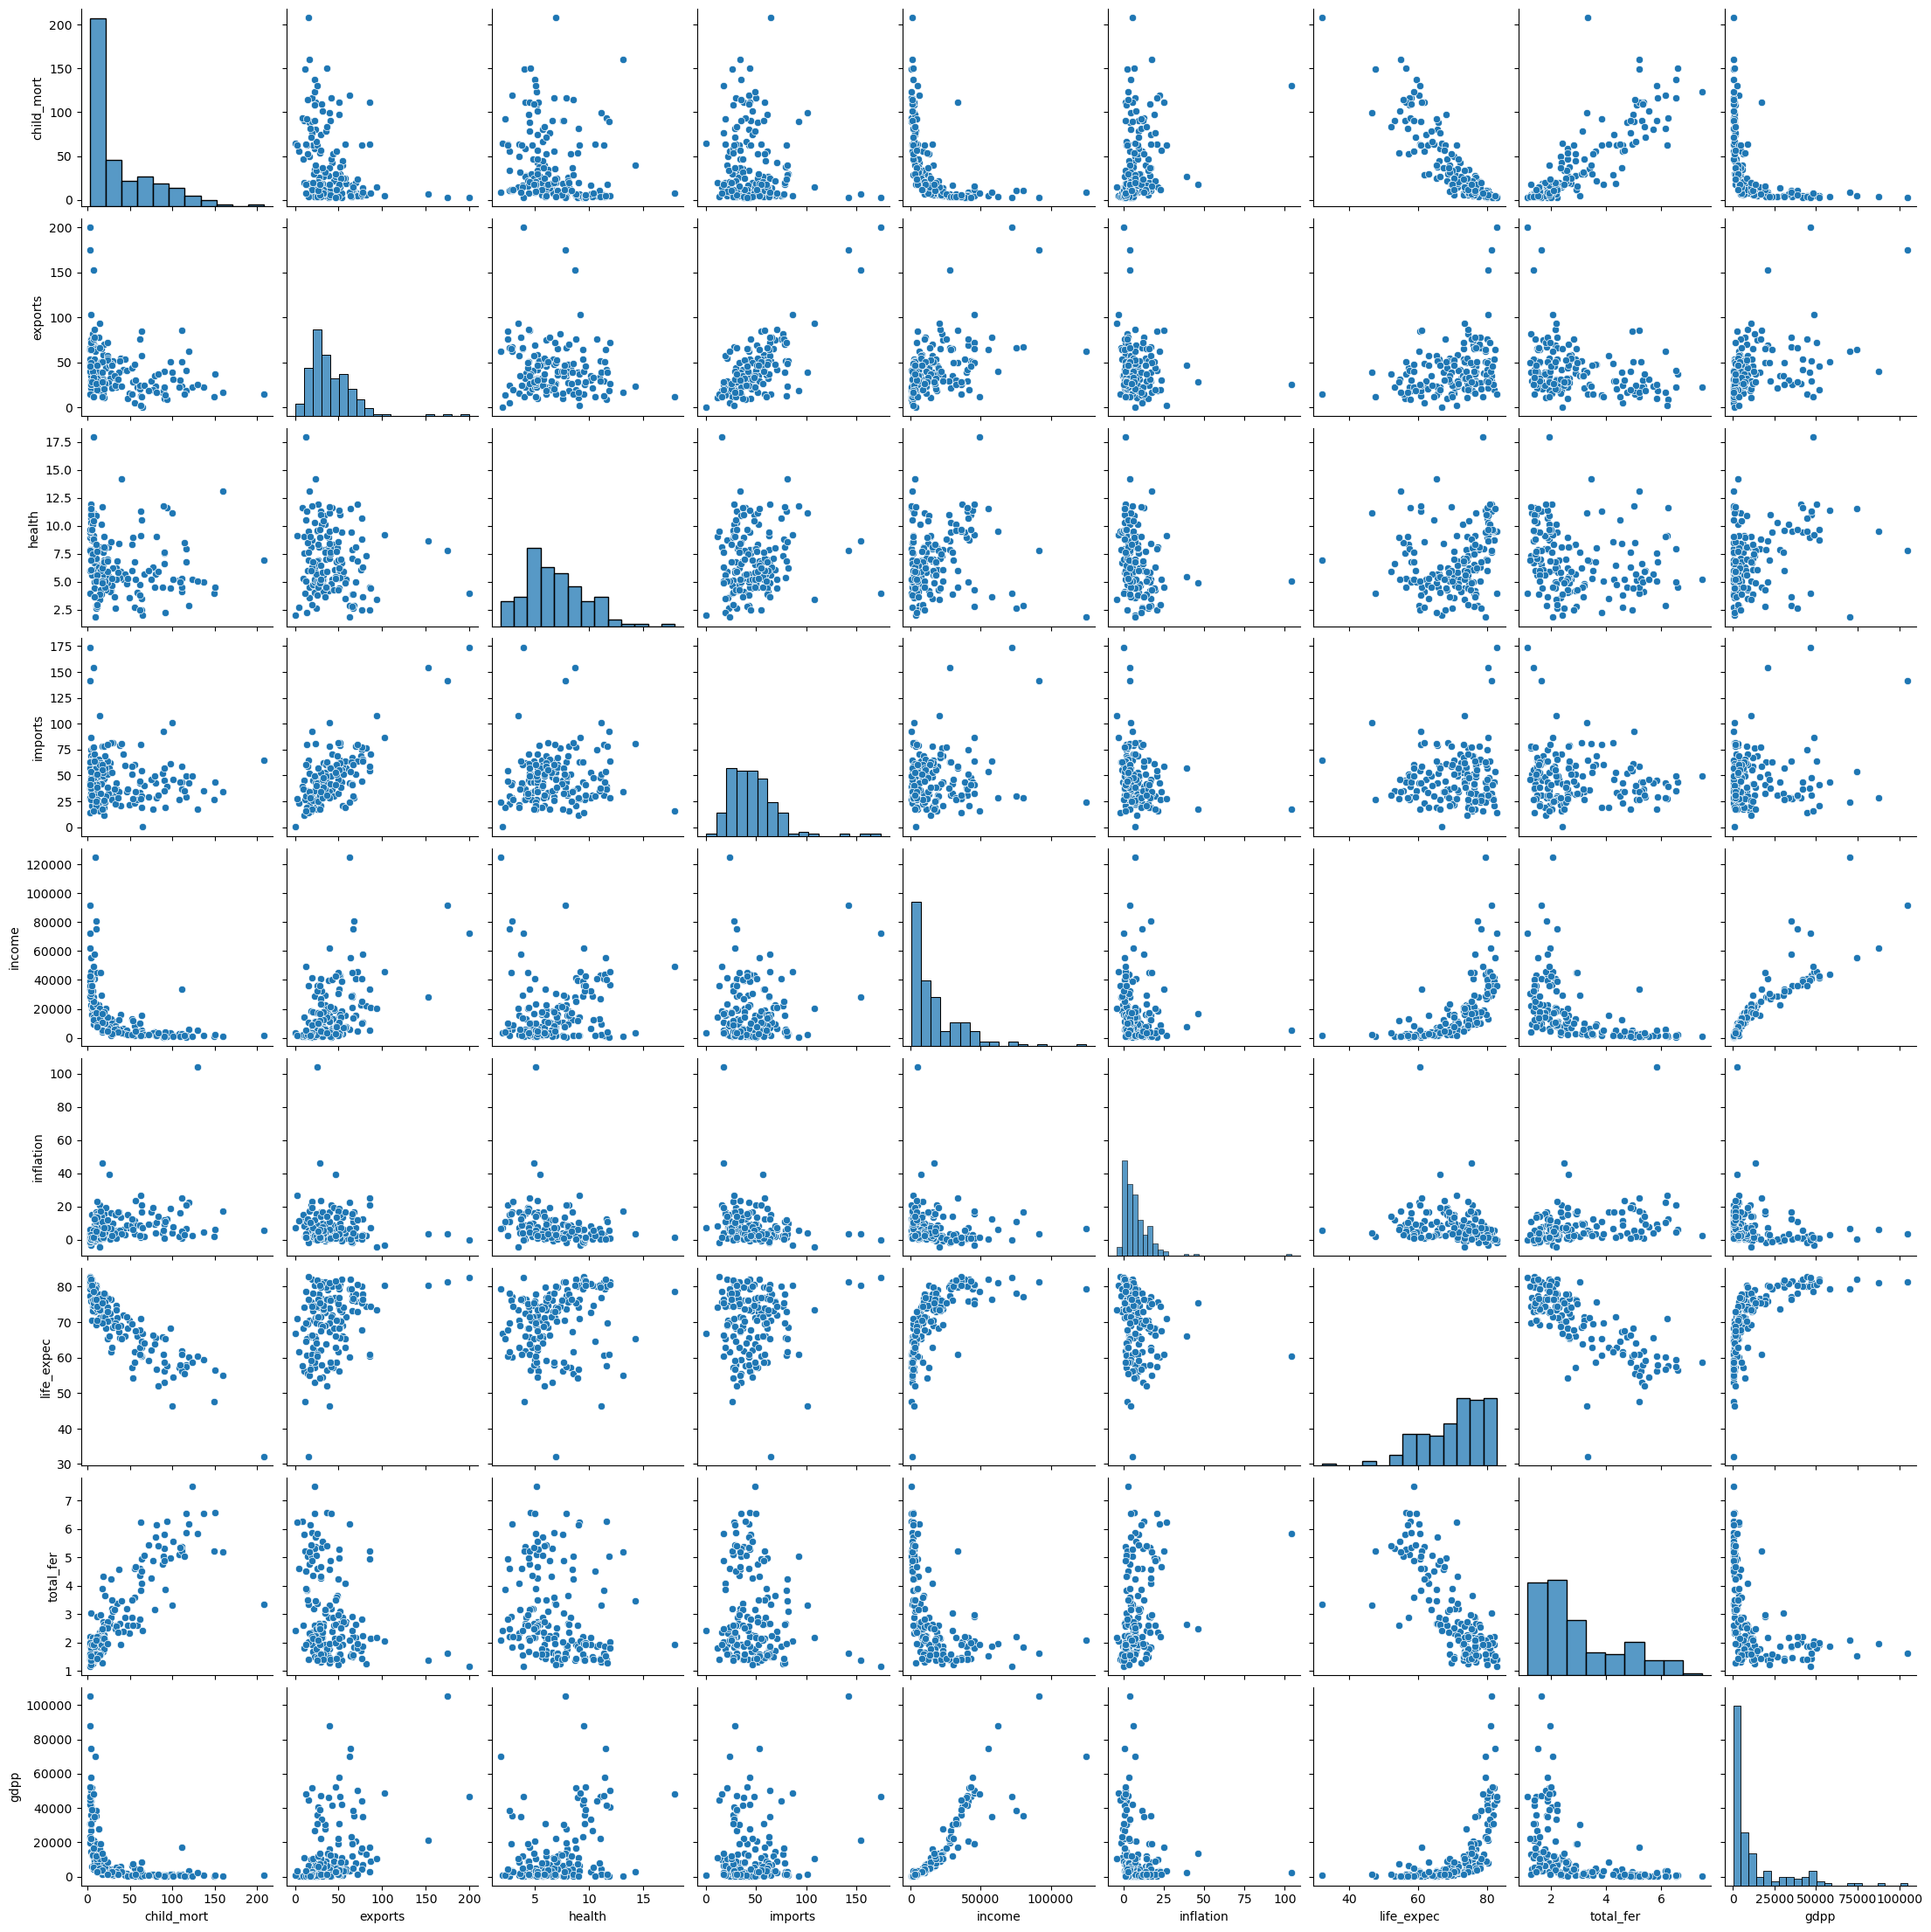

In [85]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(data = dset)



Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

gddp - exports, health, life exp, total fert 
child mort - exports 


### Scaling the Data

In [89]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

dset = dset.astype('float64')

scaler = MinMaxScaler()
scaler.fit(dset)

df_scaled = pd.DataFrame(scaler.transform(dset), columns = clist, index = dset.index)






## K-Means Clustering

### Selecting K

In [90]:
# prepare the data 

X = df_scaled[['gdpp', 'child_mort']]
clist = X.columns.to_list()

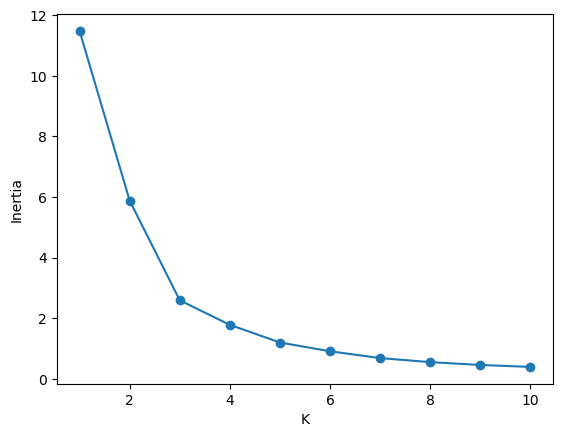

In [91]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

elbow_Kmeans(X, 10, 50)

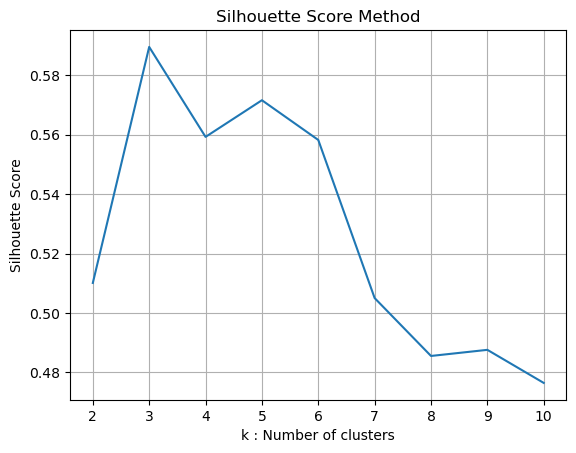

In [102]:
# Silhouette score method


def sil_sc_func(k, data = X):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_, metric='euclidean')
    return score

kmax = 10
sil = []
ks = []
plt.plot()

for k in range(2, kmax+1):
    sil.append(sil_sc_func(k, X))
    ks.append(k)

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()



In [105]:
ks = range(2, kmax+1)

for i in range(len(ks)):
    if sil[i] == max(sil):
        opt_cl = ks[i]

opt_cl



3

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [106]:
# Remember to set the random_state to rseed
kmeans = KMeans(n_clusters=opt_cl, random_state=rseed, max_iter=500)
kmeans.fit(X)



KMeans(max_iter=500, n_clusters=3, random_state=42)

In [107]:
# Count the number of records in each cluster
r_per_cl = pd.DataFrame(kmeans.labels_)
r_per_cl.value_counts()


0    93
2    44
1    30
Name: count, dtype: int64

In [108]:
# Check model performance with the silhouette coefficient

print(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean'))



0.3261597055100401


## Predictions

In [109]:
# Add the predicted cluster label column to the original dataframe

dset['cluster'] = r_per_cl.squeeze(axis=1)


## Visualisation of clusters

In [110]:
#kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 20) 

y_pred = kmeans.fit_predict(X)


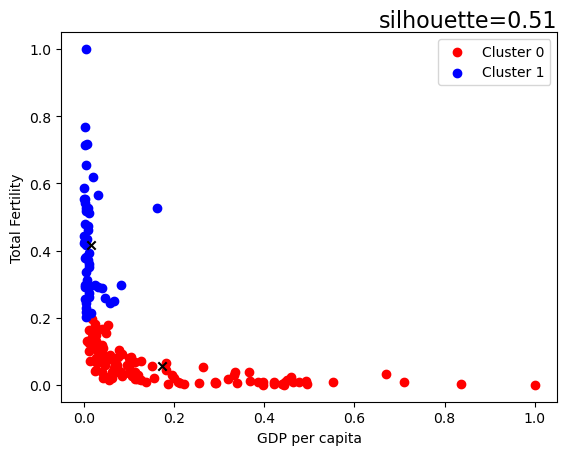

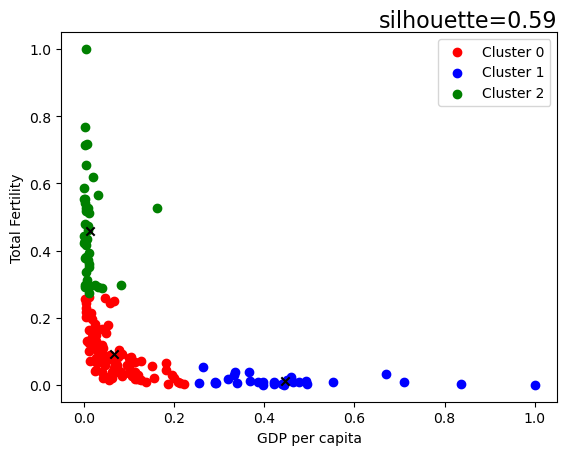

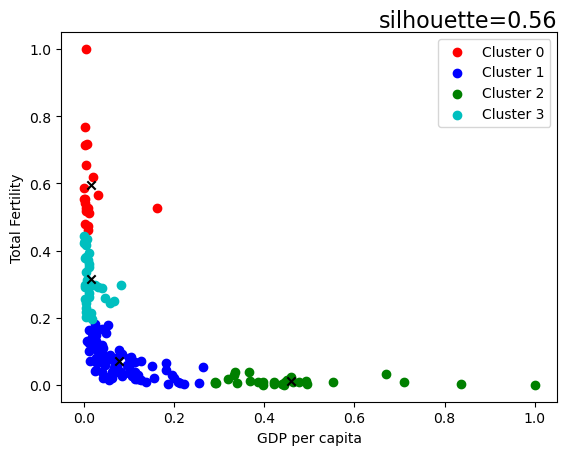

In [111]:
# Visualisation of clusters: child mortality vs gdpp

colours = 'rbgcmy'

# from notebook provided
def scatter_Kmeans(x, k, r=123):
    #fit and make predictions with the model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r) 
    y_pred = kmeans.fit_predict(x)
   
    for c in range(k):
        plt.scatter(x[y_pred == c][clist[0]], x[y_pred == c][clist[1]], c = colours[c], label = f'Cluster {c}') 
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'k')
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title(f'silhouette={score}', loc='right', fontdict={'fontsize': 16}, pad=-14) 
    plt.xlabel('GDP per capita')
    plt.ylabel('Total Fertility')
    plt.legend() 
    plt.show()

for k in range(2,5):
    scatter_Kmeans(X, k, r=0)


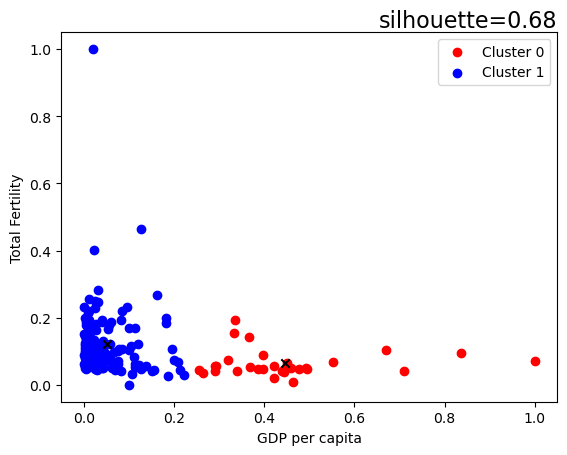

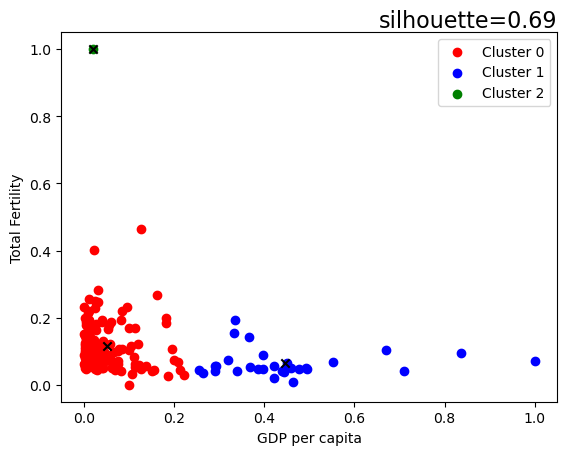

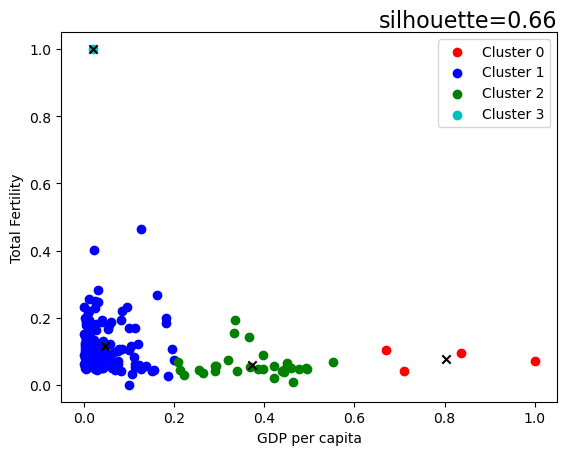

In [112]:
# Visualisation of clusters: inflation vs gdpp

X = df_scaled[['gdpp', 'inflation']]
clist = X.columns.to_list()


for k in range(2,5):
    scatter_Kmeans(X, k, r=0)



## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**